### Analysis of Child Health Data

Looking at the child health data in Ghana from various perspectives.

_This section is to be deprecated. We are ignoring Child health data for now, because we are uncertain about their reliability. Relevant section starts with *New Combined GLSS Data Set* below._


In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [5]:
# Dataset location
database = 'C:\Ghana\Ghana hackfest\Ghana hackfest\dhs-childhealth\dhs_14_93_u5disease_gps.csv'

# Read in a CSV file and store the contents in a dataframe (df)
df = pd.read_csv(database, low_memory=False)
df.head()

,caseid,midx,v000,v001,v002,v003,v004,v005,v006,v007,...,adm1name,dhsregco,dhsregna,source,urban_rura,latnum,longnum,alt_gps,alt_dem,datum
0,1 2 1,NaN,GH2,1,2,1,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84
1,1 3 1,NaN,GH2,1,3,1,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84
2,1 2 1,NaN,GH2,1,2,1,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84
3,1 4 1,NaN,GH2,1,4,1,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84
4,1 7 2,NaN,GH2,1,7,2,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84


In [6]:
df.shape

(18222, 68)

In [7]:
df.columns

Index(['caseid', 'midx', 'v000', 'v001', 'v002', 'v003', 'v004', 'v005',
       'v006', 'v007', 'v008', 'v012', 'v024', 'v130', 'v131', 'v133', 'v201',
       'v202', 'v203', 'v213', 'v218', 'v461', 'v501', 'v714', 'b8', 'h11',
       'h22', 'h31', 'hhid', 'hv000', 'hv003', 'hv004', 'hv005', 'hv006',
       'hv007', 'hv008', 'hv009', 'hv014', 'hv025', 'hv204', 'hv205', 'hv213',
       'hv219', 'hv220', 'hv226', 'hv227', 'hv228', 'hv270', 'hv108_01',
       'dhsyear', 'dhsid', 'dhscc', 'ccfips', 'adm1fips', 'adm1fipsna',
       'adm1salbna', 'adm1salbco', 'adm1dhs', 'adm1name', 'dhsregco',
       'dhsregna', 'source', 'urban_rura', 'latnum', 'longnum', 'alt_gps',
       'alt_dem', 'datum'],
      dtype='object')

Column Readability

Load Column Names from separate List and change for readability.

_This section is to be deprecated. We are ignoring Child health data for now, because we are uncertain about their reliability. Relevant section starts with *New Combined GLSS Data Set* below._

In [8]:
# Dataset location
dbColumns = 'C:\Ghana\Ghana hackfest\Ghana hackfest\dhs-childhealth\\variablelistcsv.csv'
# Read in a CSV file 
dfc = pd.read_csv(dbColumns, low_memory=False)
dfc.head()


,name,varlab
0,caseid,case identification
1,midx,index to birth history
2,v000,country code and phase
3,v001,cluster number
4,v002,household number


In [9]:
new_column_names = dfc['varlab'].tolist()

In [10]:
df.columns = new_column_names
df.head()

,case identification,index to birth history,country code and phase,cluster number,household number,respondent's line number,ultimate area unit,women's individual sample weight (6 decimals),month of interview,year of interview,...,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM
0,1 2 1,NaN,GH2,1,2,1,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84
1,1 3 1,NaN,GH2,1,3,1,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84
2,1 2 1,NaN,GH2,1,2,1,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84
3,1 4 1,NaN,GH2,1,4,1,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84
4,1 7 2,NaN,GH2,1,7,2,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84


In [11]:
print(new_column_names)

['case identification', 'index to birth history', 'country code and phase', 'cluster number', 'household number', "respondent's line number", 'ultimate area unit', "women's individual sample weight (6 decimals)", 'month of interview', 'year of interview', 'date of interview (cmc)', "respondent's current age", 'region', 'religion', 'ethnicity', 'education in single years', 'total children ever born', 'sons at home', 'daughters at home', 'currently pregnant', 'number of living children', 'respondent slept under mosquito bed net', 'current marital status', 'respondent currently working', 'current age of child', 'had diarrhea recently', 'had fever in last two weeks', 'had cough in last two weeks', 'case identification', 'country code and phase', "respondent's line number (answering household questionnaire)", 'ultimate area unit', 'household sample weight (6 decimals)', 'month of interview', 'year of interview', 'date of interview (cmc)', 'number of household members', 'number of children 5

In [12]:
new_column_names = ['caseid', 'indextobirthhistory', 'countrycode', 'cluster', 'household', "line", 'ultimateareaunit', "womensampleweight", 'monthofinterview', 'yearofinterview', 'dateofinterview', "age", 'region', 'religion', 'ethnicity', 'education', 'totalchildren', 'sons', 'daughters', 'pregnant', 'livingchildren', 'mosquito', 'maritalstatus', 'working', 'ageofchild', 'diarrhea', 'fever', 'cough', 'caseidentification', 'country code and phase', "respondent's line number (answering household questionnaire)", 'ultimate area unit', 'household sample weight (6 decimals)', 'month of interview', 'year of interview', 'date of interview (cmc)', 'number of household members', 'number of children 5 and under (de jure)', 'type of place of residence', 'time to get to water source (minutes)', 'type of toilet facility', 'main floor material', 'sex of head of household', 'age of head of household', 'type of cooking fuel', 'has mosquito bed net for sleeping', 'children under 5 slept under mosquito bed net last night', 'wealth index', 'education completed in single years', 'Survey year', 'DHSID', 'DHSCC', 'CCFIPS', 'ADM1FIPS', 'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS', 'ADM1NAME', 'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM', 'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM']

In [13]:
df.columns = new_column_names
df.head()

,caseid,indextobirthhistory,countrycode,cluster,household,line,ultimateareaunit,womensampleweight,monthofinterview,yearofinterview,...,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM
0,1 2 1,NaN,GH2,1,2,1,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84
1,1 3 1,NaN,GH2,1,3,1,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84
2,1 2 1,NaN,GH2,1,2,1,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84
3,1 4 1,NaN,GH2,1,4,1,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84
4,1 7 2,NaN,GH2,1,7,2,1,1000000,11,93,...,Western,1,western,GAZ,R,5.1,-3.0833,9999,8,WGS84



# New Combined GLSS Data Set

We now have a full data set that combines Income, Lighting and Deforestation Data linked by latitutude and longitude information. 

In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
%matplotlib inline

from sklearn.decomposition import PCA 

In [14]:
# Dataset location
maindb = 'C:\Ghana\Ghana hackfest\Ghana hackfest\combinedGLSS\CSV2MAINglss4_5_6_alignedfclmal_nl.csv'

# Read in a CSV file and store the contents in a dataframe (df)
df2 = pd.read_csv(maindb, low_memory=False, sep=',')
df2.head()


,hhid,glss,year,region,clust,nh,pid,sex,mining_region,age,...,nl_2011_sum_1km,nl_2011_mean_1km,nl_2011_media_1km,nl_2012_sum_1km,nl_2012_mean_1km,nl_2012_media_1km,nl_2013_sum_1km,nl_2013_mean_1km,nl_2013_media_1km,_merge_glss_mal_nl1
0,1.0,4,98.0,1.0,4002,1.0,2.0,2.0,1.0,51.0,...,12.0,4.0,4.0,10.0,3.333333,5.0,10.0,3.333333,5.0,matched (3)
1,1.0,4,98.0,1.0,4002,1.0,6.0,1.0,1.0,17.0,...,12.0,4.0,4.0,10.0,3.333333,5.0,10.0,3.333333,5.0,matched (3)
2,1.0,4,98.0,1.0,4002,1.0,1.0,1.0,1.0,57.0,...,12.0,4.0,4.0,10.0,3.333333,5.0,10.0,3.333333,5.0,matched (3)
3,1.0,4,98.0,1.0,4002,1.0,4.0,1.0,1.0,22.0,...,12.0,4.0,4.0,10.0,3.333333,5.0,10.0,3.333333,5.0,matched (3)
4,1.0,4,98.0,1.0,4002,1.0,3.0,2.0,1.0,26.0,...,12.0,4.0,4.0,10.0,3.333333,5.0,10.0,3.333333,5.0,matched (3)


In [15]:
df2.shape

(136285, 700)

In [16]:
corrdf = df2.corr()

### Create a Correlation Heatmap

,hhid,glss,year,region,clust,nh,pid,sex,mining_region,age,...,nl_2010_media_1km,nl_2011_sum_1km,nl_2011_mean_1km,nl_2011_media_1km,nl_2012_sum_1km,nl_2012_mean_1km,nl_2012_media_1km,nl_2013_sum_1km,nl_2013_mean_1km,nl_2013_media_1km
hhid,1.000000,0.927561,0.579349,0.093887,0.998626,-0.163708,0.005572,-0.001990,-0.088914,0.014387,...,-0.156124,-0.171103,-0.152445,-0.153455,-0.168451,-0.149447,-0.150168,-0.166918,-0.148078,-0.148397
glss,0.927561,1.000000,0.841910,0.119150,0.906768,-0.210315,0.008909,-0.003766,-0.097291,0.016360,...,-0.137187,-0.157913,-0.136011,-0.137501,-0.153992,-0.131939,-0.132813,-0.152962,-0.130932,-0.131161
year,0.579349,0.841910,1.000000,0.136539,0.535980,-0.222512,0.013153,-0.005466,-0.090166,0.014678,...,-0.076963,-0.099606,-0.079454,-0.081191,-0.095241,-0.075262,-0.076108,-0.095169,-0.075008,-0.075059
region,0.093887,0.119150,0.136539,1.000000,0.089694,-0.046583,0.133078,-0.011839,-0.516582,-0.012522,...,-0.292804,-0.288051,-0.288791,-0.289620,-0.301516,-0.303993,-0.304807,-0.299895,-0.301415,-0.302136
clust,0.998626,0.906768,0.535980,0.089694,1.000000,-0.155307,0.005050,-0.001745,-0.086895,0.013926,...,-0.157059,-0.171089,-0.153095,-0.154027,-0.168615,-0.150248,-0.150941,-0.167017,-0.148830,-0.149155
nh,-0.163708,-0.210315,-0.222512,-0.046583,-0.155307,1.000000,-0.007699,-0.002716,0.023667,-0.005303,...,0.045109,0.053004,0.044641,0.045152,0.051970,0.043624,0.044180,0.051399,0.042836,0.043161
pid,0.005572,0.008909,0.013153,0.133078,0.005050,-0.007699,1.000000,0.036562,-0.068954,-0.503714,...,-0.112103,-0.106421,-0.110967,-0.110916,-0.108326,-0.113005,-0.113017,-0.109543,-0.114113,-0.114087
sex,-0.001990,-0.003766,-0.005466,-0.011839,-0.001745,-0.002716,0.036562,1.000000,0.008150,0.044231,...,0.011680,0.010254,0.011505,0.011547,0.010257,0.011496,0.011545,0.010926,0.012256,0.012280
mining_region,-0.088914,-0.097291,-0.090166,-0.516582,-0.086895,0.023667,-0.068954,0.008150,1.000000,-0.009448,...,0.111202,0.091140,0.108289,0.107256,0.109329,0.127353,0.125682,0.100682,0.118156,0.115947
age,0.014387,0.016360,0.014678,-0.012522,0.013926,-0.005303,-0.503714,0.044231,-0.009448,1.000000,...,0.025976,0.024399,0.025665,0.025642,0.024184,0.025483,0.025572,0.024348,0.025526,0.025589


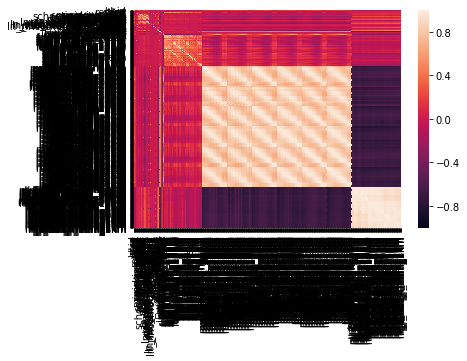

In [17]:
#Correlation Matrix

corr = (corrdf)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# sns.title('Heatmap of Correlation Matrix')
corr

In [18]:
plt.show()

## Split Data
Split data column-wise to better visualize the uncorrelated feature, taking approximately the first 30 % of features.

In [19]:
dfA = pd.DataFrame(df2[df2.columns[0:190]])

,hhid,glss,year,region,clust,nh,pid,sex,mining_region,age,...,fcl15_sum_1km,fcl15_mean_1km,fcl16_sum_1km,fcl16_mean_1km,mp00_mean_10km,mp00_media_10km,mp00_min_10km,mp00_max_10km,mp01_mean_10km,mp01_media_10km
hhid,1.000000,0.927561,0.579349,0.093887,0.998626,-0.163708,0.005572,-0.001990,-0.088914,0.014387,...,0.000251,0.000172,-0.066415,-0.066452,0.214458,0.214576,0.213148,0.201670,0.212986,0.213083
glss,0.927561,1.000000,0.841910,0.119150,0.906768,-0.210315,0.008909,-0.003766,-0.097291,0.016360,...,-0.009138,-0.009199,-0.076762,-0.076767,0.206937,0.207640,0.208894,0.190024,0.207268,0.207928
year,0.579349,0.841910,1.000000,0.136539,0.535980,-0.222512,0.013153,-0.005466,-0.090166,0.014678,...,-0.022683,-0.022707,-0.072823,-0.072786,0.141315,0.142603,0.147903,0.122539,0.143857,0.145090
region,0.093887,0.119150,0.136539,1.000000,0.089694,-0.046583,0.133078,-0.011839,-0.516582,-0.012522,...,-0.259233,-0.259580,-0.258168,-0.258435,0.157069,0.155735,0.211125,0.083610,0.144672,0.143737
clust,0.998626,0.906768,0.535980,0.089694,1.000000,-0.155307,0.005050,-0.001745,-0.086895,0.013926,...,0.001674,0.001593,-0.064065,-0.064107,0.213190,0.213219,0.211362,0.201211,0.211451,0.211459
nh,-0.163708,-0.210315,-0.222512,-0.046583,-0.155307,1.000000,-0.007699,-0.002716,0.023667,-0.005303,...,0.009690,0.009707,0.019688,0.019689,-0.058276,-0.058596,-0.061513,-0.051012,-0.059671,-0.060000
pid,0.005572,0.008909,0.013153,0.133078,0.005050,-0.007699,1.000000,0.036562,-0.068954,-0.503714,...,-0.027732,-0.027778,-0.039895,-0.039920,0.101773,0.099760,0.118349,0.084675,0.101816,0.099882
sex,-0.001990,-0.003766,-0.005466,-0.011839,-0.001745,-0.002716,0.036562,1.000000,0.008150,0.044231,...,-0.002699,-0.002696,-0.001962,-0.001957,-0.011951,-0.011582,-0.013828,-0.010646,-0.011605,-0.011289
mining_region,-0.088914,-0.097291,-0.090166,-0.516582,-0.086895,0.023667,-0.068954,0.008150,1.000000,-0.009448,...,0.299519,0.299597,0.296038,0.295902,-0.148683,-0.140054,-0.187142,-0.096159,-0.067555,-0.061316
age,0.014387,0.016360,0.014678,-0.012522,0.013926,-0.005303,-0.503714,0.044231,-0.009448,1.000000,...,-0.004375,-0.004355,0.003870,0.003893,-0.031640,-0.031037,-0.034511,-0.029990,-0.034454,-0.033865


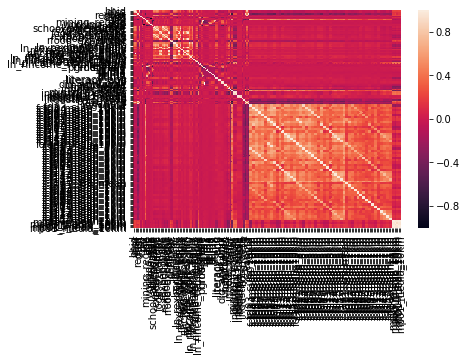

In [20]:
#Correlation Matrix
corr2 = dfA.corr()
corr = (corr2)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# sns.title('Heatmap of Correlation Matrix')
corr

In [21]:
dfA.columns

Index(['hhid', 'glss', 'year', 'region', 'clust', 'nh', 'pid', 'sex',
       'mining_region', 'age',
       ...
       'fcl15_mean_1km', 'fcl16_sum_1km', 'fcl16_mean_1km', '_merge_glss_fcl1',
       'mp00_mean_10km', 'mp00_media_10km', 'mp00_min_10km', 'mp00_max_10km',
       'mp01_mean_10km', 'mp01_media_10km'],
      dtype='object', length=190)

In [22]:
# Check to see if there are any missing values in our data set
dfA.isnull().any()

hhid                  True
glss                 False
year                  True
region                True
clust                False
nh                    True
pid                   True
sex                   True
mining_region         True
age                   True
working_age           True
prime_age             True
male                  True
educ_attainment       True
school_attendance     True
expenditure           True
expenditurepc         True
food_expend           True
food_expendpc         True
inc                   True
incpc                 True
rexpenditure          True
rexpenditurepc        True
rfood_expend          True
rfood_expendpc        True
rincpc                True
poor                  True
poor_ext              True
ln_rincpc             True
ln_rincequiv          True
                     ...  
fcl05_mean_1km        True
fcl06_sum_1km         True
fcl06_mean_1km        True
fcl07_sum_1km         True
fcl07_mean_1km        True
fcl08_sum_1km         True
f

In [23]:
dfA.describe()

,hhid,glss,year,region,clust,nh,pid,sex,mining_region,age,...,fcl15_sum_1km,fcl15_mean_1km,fcl16_sum_1km,fcl16_mean_1km,mp00_mean_10km,mp00_media_10km,mp00_min_10km,mp00_max_10km,mp01_mean_10km,mp01_media_10km
count,1.362820e+05,136285.000000,136282.000000,136282.000000,136285.000000,136282.000000,136282.000000,136279.000000,136282.000000,136279.000000,...,116054.000000,116054.000000,116054.000000,116054.000000,116054.000000,116054.000000,116054.000000,116054.000000,116054.000000,116054.000000
mean,3.381618e+06,5.339759,1639.784513,5.497637,34685.457915,8.695550,3.557234,1.517615,0.319030,24.304038,...,9.678538,0.002395,22.233434,0.005504,0.618455,0.620199,0.551027,0.676839,0.580516,0.581931
std,2.875556e+06,0.782248,755.834710,2.769334,27771.615372,4.920157,2.579305,0.499691,0.466102,19.716641,...,21.271825,0.005265,44.461776,0.011009,0.132773,0.133177,0.148277,0.120186,0.150359,0.151142
min,1.000000e+00,4.000000,98.000000,1.000000,4002.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.258173,0.274931,0.193264,0.334148,0.213610,0.229065
25%,5.140170e+05,5.000000,2005.000000,3.000000,5140.000000,5.000000,2.000000,1.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.566468,0.564576,0.462486,0.638744,0.505737,0.504594
50%,6.008306e+06,6.000000,2012.000000,6.000000,60083.000000,9.000000,3.000000,2.000000,0.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.646940,0.646774,0.586854,0.700450,0.609653,0.610530
75%,6.072609e+06,6.000000,2013.000000,8.000000,60726.000000,13.000000,5.000000,2.000000,1.000000,36.000000,...,11.000000,0.002692,26.000000,0.006439,0.703224,0.705198,0.652918,0.748308,0.673990,0.676075
max,6.120015e+06,6.000000,2013.000000,10.000000,61200.000000,26.000000,30.000000,2.000000,1.000000,99.000000,...,343.000000,0.084901,570.000000,0.140950,0.898326,0.899879,0.877845,0.932386,0.925346,0.923043


In [24]:
dfA.dtypes

hhid                 float64
glss                   int64
year                 float64
region               float64
clust                  int64
nh                   float64
pid                  float64
sex                  float64
mining_region        float64
age                  float64
working_age          float64
prime_age            float64
male                 float64
educ_attainment       object
school_attendance    float64
expenditure          float64
expenditurepc        float64
food_expend          float64
food_expendpc        float64
inc                  float64
incpc                float64
rexpenditure         float64
rexpenditurepc       float64
rfood_expend         float64
rfood_expendpc       float64
rincpc               float64
poor                 float64
poor_ext             float64
ln_rincpc            float64
ln_rincequiv         float64
                      ...   
fcl05_mean_1km       float64
fcl06_sum_1km        float64
fcl06_mean_1km       float64
fcl07_sum_1km 

In [25]:
dfA.to_csv('200FeatureRedMainData.csv')

In [26]:
dfA.shape

(136285, 190)

### Dropping Geodata

We are dropping all geographical data, so we do consider it in the unsupervised clustering that we are going to perform later on the data. The clustering should be based on other features than location. 

In [27]:
dfA.drop(['hhid', 'region', 'clust', 'nh', 'pid', 'x', 'y', 'eanum', 'reg_code', 'dist_name', 'reg_name'], axis=1)

,glss,year,sex,mining_region,age,working_age,prime_age,male,educ_attainment,school_attendance,...,fcl15_mean_1km,fcl16_sum_1km,fcl16_mean_1km,_merge_glss_fcl1,mp00_mean_10km,mp00_media_10km,mp00_min_10km,mp00_max_10km,mp01_mean_10km,mp01_media_10km
0,4,98.0,2.0,1.0,51.0,1.0,0.0,0.0,never in school,0.0,...,0.0,20.0,0.004954,matched (3),0.871789,0.880314,0.818355,0.895042,0.896693,0.903261
1,4,98.0,1.0,1.0,17.0,1.0,0.0,1.0,less than primary,1.0,...,0.0,20.0,0.004954,matched (3),0.871789,0.880314,0.818355,0.895042,0.896693,0.903261
2,4,98.0,1.0,1.0,57.0,1.0,0.0,1.0,less than primary,0.0,...,0.0,20.0,0.004954,matched (3),0.871789,0.880314,0.818355,0.895042,0.896693,0.903261
3,4,98.0,1.0,1.0,22.0,1.0,1.0,1.0,Secondary or higher,0.0,...,0.0,20.0,0.004954,matched (3),0.871789,0.880314,0.818355,0.895042,0.896693,0.903261
4,4,98.0,2.0,1.0,26.0,1.0,1.0,0.0,NaN,NaN,...,0.0,20.0,0.004954,matched (3),0.871789,0.880314,0.818355,0.895042,0.896693,0.903261
5,4,98.0,1.0,1.0,16.0,1.0,0.0,1.0,less than primary,1.0,...,0.0,20.0,0.004954,matched (3),0.871789,0.880314,0.818355,0.895042,0.896693,0.903261
6,4,98.0,2.0,1.0,9.0,0.0,0.0,0.0,less than primary,1.0,...,0.0,20.0,0.004954,matched (3),0.871789,0.880314,0.818355,0.895042,0.896693,0.903261
7,4,98.0,1.0,1.0,19.0,1.0,0.0,1.0,Secondary or higher,0.0,...,0.0,20.0,0.004954,matched (3),0.871789,0.880314,0.818355,0.895042,0.896693,0.903261
8,4,98.0,1.0,1.0,27.0,1.0,1.0,1.0,MSLC/BECE/VOC,0.0,...,0.0,20.0,0.004954,matched (3),0.871789,0.880314,0.818355,0.895042,0.896693,0.903261
9,4,98.0,2.0,1.0,2.0,0.0,0.0,0.0,NaN,NaN,...,0.0,20.0,0.004954,matched (3),0.871789,0.880314,0.818355,0.895042,0.896693,0.903261


### PCA

We want to further reduce these 179 columns with PCA so we have a smaller number of features to work with. 

In [39]:
pca = PCA(n_components=5)

pca.fit(df) 

SyntaxError: invalid character in identifier (<ipython-input-39-8b2724303030>, line 1)